## Images

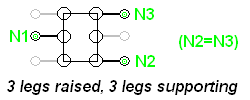

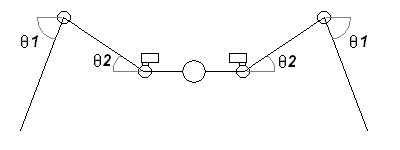

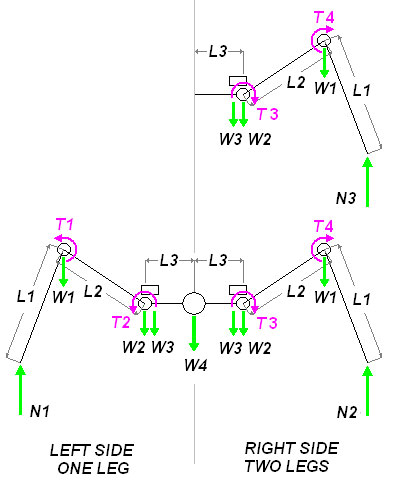

## Manual Torque Program

In [4]:
# Manual torque from angle solve

# calculations derived from https://community.robotshop.com/tutorials/show/robot-leg-torque-tutorial
# program copyright Dylan Holmes, 2023, all rights reserved

from math import cos

theta_1 = int(input("Theta 1: "))
theta_2 = int(input("Theta 2: "))

# grams
m4 = 764
m3 = 40
m2 = 50
m1 = 50

# m
L1 = 0.010
L2 = 0.014
L3 = 0.021

W4 = 9.8 * m4/1000
W3 = 9.8 * m3/1000
W2 = 9.8 * m2/1000
W1 = 9.8 * m1/1000

print("----------------------------------------------------")
print("Weights (Newtons): ")
print("4: " + str(W4))
print("3: " + str(W3))
print("2: " + str(W2))
print("1: " + str(W1))
print("TotalWeight: " + str(W4 + 6*(W1+W2+W3)))

# N1 + 2*N2
CombinedThreeLegNormal = W4 + 6*(W1+W2+W3)

# Torque Left Foot = 0
# = sum of torques on the left foot

Tlf1 = W1 * L1 * cos(theta_1)
Tlf2 = W2 * (L1 * cos(theta_1) + L2 * cos(theta_2))
Tlf3 = W3 * (L1 * cos(theta_1) + L2 * cos(theta_2))
Tlf4 = W4 * (L1 * cos(theta_1) + L2 * cos(theta_2) + L3)

Tlf5 = 2 * W3 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
Tlf6 = 2 * W2 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
Tlf7 = 2 * W1 * (L1 * cos(theta_1) + 2 * L2 * cos(theta_2) + 2 * L3)

# This * 2 * N2 = Tlf8
Tlf_p8 = 2*L1*cos(theta_1) + 2 *L2 * cos(theta_2) + 2 * L3

# As, 
# N1 + 2N2 = CombinedThreeLegNormal
# And NetTorque = 0

N2 = ((Tlf1 + Tlf2 + Tlf3 + Tlf4 + Tlf5 + Tlf6 + Tlf7)/Tlf_p8)/2
N1 = CombinedThreeLegNormal - 2*N2

print("----------------------------------------------------")
print("Normal2 (Shared normal of two leg side): " + str(N2))
print("Normal1 (Normal of one leg side): " + str(N1))
print("----------------------------------------------------")

# Torque on the knee = 0
# = Sum of torques around the knee

Tk1 = N1 * (L1 * cos(theta_1))
      # two in one here          |    ----------------
Tk2 = W2 * ( L2 * cos(theta_2)) + W3 * (L2 * cos(theta_2))
      # two in one here               |    ----------------
Tk3 = W4 * (L2 * cos(theta_2) + L3 ) + 2 * W3 * (L2 * cos(theta_2) + 2 * L3)
Tk4 = 2 * W2 * (L2 * cos(theta_2) + 2 * L3)
Tk5 = 2 * W1 * (2 * L2 * cos(theta_2) + 2 * L3)
Tk6 = -2 * N2 * (2 * L2 * cos(theta_2) + 2 * L3 + L1 * cos(theta_1))

T1 = Tk1 + Tk2 + Tk3 + Tk4 + Tk5 + Tk6

print("Torque 1 (Nm) : " + str(T1))
print("Torque 1 (Ncm) : " + str(T1 * 100))

# Torque on Hip = 0
# = sum of torques around the hip

Th1 = N1 * (L1 * cos(theta_1) + L2 * cos(theta_2))
Th2 = -W1 * (L2 * cos(theta_2))
Th3 = W4 * L3
Th4 = 2 * W2 * L3
Th5 = 2 * W3 * L3
Th6 = 2 * W1 * (2 * L3 + L2 * cos(theta_2))
Th7 = -2 * N2 * (2 * L3 + L2 * cos(theta_2) + L1 * cos(theta_1))

T2 = Th1 + Th2 + Th3 + Th4 + Th5 + Th6 + Th7

print("Torque 2 (Nm) : " + str(T2))
print("Torque 2 (Ncm) : " + str(T2 * 100))


Theta 1:  45
Theta 2:  45


----------------------------------------------------
Weights (Newtons): 
4: 7.4872000000000005
3: 0.392
2: 0.49000000000000005
1: 0.49000000000000005
TotalWeight: 15.7192
----------------------------------------------------
Normal2 (Shared normal of two leg side): 3.1419328512161346
Normal1 (Normal of one leg side): 9.435334297567731
----------------------------------------------------
Torque 1 (Nm) : 0.02162225305973775
Torque 1 (Ncm) : 2.162225305973775
Torque 2 (Nm) : 0.014849407343370535
Torque 2 (Ncm) : 1.4849407343370535


## Maximum Torque Locator

----------------------------------------------------
Weights (Newtons): 
4: 7.4872000000000005
3: 0.392
2: 0.49000000000000005
1: 0.49000000000000005
TotalWeight: 15.7192
Torque 1 max: 
(N.m): 0.041145489287575054
(N.cm): 4.114548928757506
(kgf.m): 0.004198519315058678
(kgf.cm): 0.41985193150586786
Torque 2 max: 
(N.m): 0.13581123194773953
(N.cm): 13.581123194773953
(kgf.m): 0.013858288974259135
(kgf.cm): 1.3858288974259134


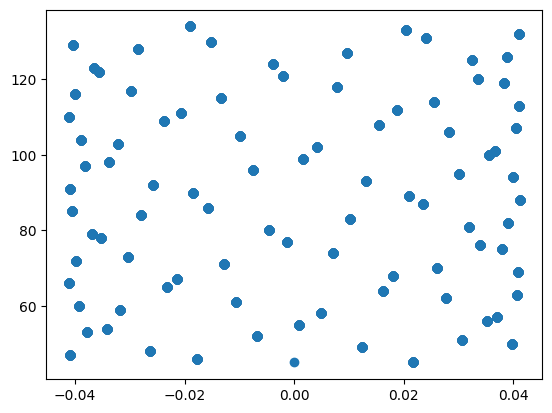

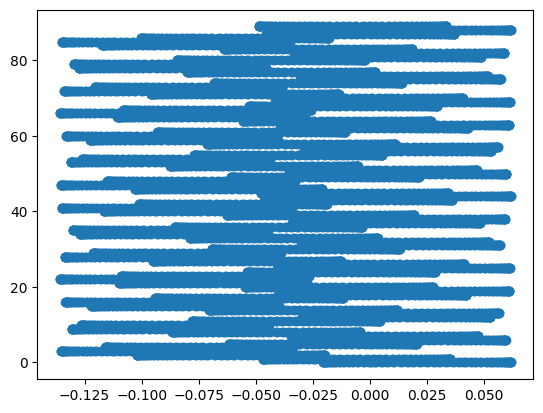

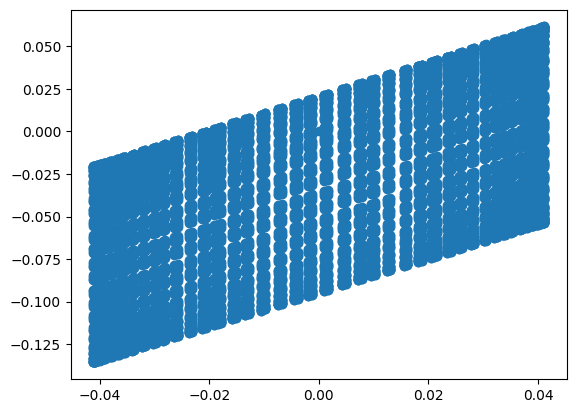

In [5]:
# Manual torque from angle solve

# calculations derived from https://community.robotshop.com/tutorials/show/robot-leg-torque-tutorial
# program copyright Dylan Holmes, 2023, all rights reserved

from math import cos
from matplotlib import pyplot as plt

theta_1_start = 45
theta_1_end = 135
theta_2_start = 0
theta_2_end = 90

# grams
m4 = 764
m3 = 40
m2 = 50
m1 = 50

# m
L1 = 0.010
L2 = 0.014
L3 = 0.021

W4 = 9.8 * m4/1000
W3 = 9.8 * m3/1000
W2 = 9.8 * m2/1000
W1 = 9.8 * m1/1000

print("----------------------------------------------------")
print("Weights (Newtons): ")
print("4: " + str(W4))
print("3: " + str(W3))
print("2: " + str(W2))
print("1: " + str(W1))
print("TotalWeight: " + str(W4 + 6*(W1+W2+W3)))

# N1 + 2*N2
CombinedThreeLegNormal = W4 + 6*(W1+W2+W3)


MaxT1 = 0
tt1 = [0]
th1 = [theta_1_start]
MaxT2 = 0
tt2 = [0]
th2 = [theta_2_start]
for theta_1 in range(theta_1_start, theta_1_end):
    for theta_2 in range(theta_2_start, theta_2_end):
        
        # Torque Left Foot = 0
        # = sum of torques on the left foot
        
        Tlf1 = W1 * L1 * cos(theta_1)
        Tlf2 = W2 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Tlf3 = W3 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Tlf4 = W4 * (L1 * cos(theta_1) + L2 * cos(theta_2) + L3)
        
        Tlf5 = 2 * W3 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
        Tlf6 = 2 * W2 * (L1 * cos(theta_1) + L2 * cos(theta_2) + 2 * L3)
        Tlf7 = 2 * W1 * (L1 * cos(theta_1) + 2 * L2 * cos(theta_2) + 2 * L3)
        
        # This * 2 * N2 = Tlf8
        Tlf_p8 = 2*L1*cos(theta_1) + 2 *L2 * cos(theta_2) + 2 * L3
        
        # As, 
        # N1 + 2N2 = CombinedThreeLegNormal
        # And NetTorque = 0
        
        N2 = ((Tlf1 + Tlf2 + Tlf3 + Tlf4 + Tlf5 + Tlf6 + Tlf7)/Tlf_p8)/2
        N1 = CombinedThreeLegNormal - 2*N2
        
        #print("----------------------------------------------------")
        #print("Normal2 (Shared normal of two leg side): " + str(N2))
        #print("Normal1 (Normal of one leg side): " + str(N1))
        #print("----------------------------------------------------")
        
        # Torque on the knee = 0
        # = Sum of torques around the knee
        
        Tk1 = N1 * (L1 * cos(theta_1))
              # two in one here          |    ----------------
        Tk2 = W2 * ( L2 * cos(theta_2)) + W3 * (L2 * cos(theta_2))
              # two in one here               |    ----------------
        Tk3 = W4 * (L2 * cos(theta_2) + L3 ) + 2 * W3 * (L2 * cos(theta_2) + 2 * L3)
        Tk4 = 2 * W2 * (L2 * cos(theta_2) + 2 * L3)
        Tk5 = 2 * W1 * (2 * L2 * cos(theta_2) + 2 * L3)
        Tk6 = -2 * N2 * (2 * L2 * cos(theta_2) + 2 * L3 + L1 * cos(theta_1))
        
        T1 = Tk1 + Tk2 + Tk3 + Tk4 + Tk5 + Tk6
        
        #print("Torque 1 (Nm) : " + str(T1))
        #print("Torque 1 (Ncm) : " + str(T1 * 100))
        
        # Torque on Hip = 0
        # = sum of torques around the hip
        
        Th1 = N1 * (L1 * cos(theta_1) + L2 * cos(theta_2))
        Th2 = -W1 * (L2 * cos(theta_2))
        Th3 = W4 * L3
        Th4 = 2 * W2 * L3
        Th5 = 2 * W3 * L3
        Th6 = 2 * W1 * (2 * L3 + L2 * cos(theta_2))
        Th7 = -2 * N2 * (2 * L3 + L2 * cos(theta_2) + L1 * cos(theta_1))
        
        T2 = Th1 + Th2 + Th3 + Th4 + Th5 + Th6 + Th7
        
        tt1.append(T1)
        tt2.append(T2)
        th1.append(theta_1)
        th2.append(theta_2)
        
        if (abs(T2) > MaxT2):
            MaxT2 = abs(T2)
        if (abs(T1) > MaxT1):
            MaxT1 = abs(T1)
        #print("Torque 2 (Nm) : " + str(T2))
        #print("Torque 2 (Ncm) : " + str(T2 * 100))

print ("Torque 1 max: ")
print ("(N.m): " + str(MaxT1))
print ("(N.cm): " + str(MaxT1 * 100))
print ("(kgf.m): " + str(MaxT1 / 9.8))
print ("(kgf.cm): " + str(MaxT1 / 9.8  * 100 ))

print ("Torque 2 max: ")
print ("(N.m): " + str(MaxT2))
print ("(N.cm): " + str(MaxT2 * 100))
print ("(kgf.m): " + str(MaxT2 / 9.8))
print ("(kgf.cm): " + str(MaxT2 / 9.8  * 100 ))

plt.scatter(tt1,th1)
plt.show()

plt.scatter(tt2,th2)
plt.show()

plt.scatter(tt1,tt2)
plt.show()

with theta_1 from 45 to 135
and theta_2 from 0 to 90

Torque 1 max: 
(N.m): 0.04113420435689147
(N.cm): 4.113420435689147
(kgf.m): 0.004197367791519537
(kgf.cm): 0.4197367791519537
Torque 2 max: 
(N.m): 0.06171420435689112
(N.cm): 6.171420435689113
(kgf.m): 0.006297367791519502
(kgf.cm): 0.6297367791519501